In [14]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.symmetry_scores import get_scores_full

from transformers import AutoModelForTextToSpectrogram

In [15]:
dir = '../../../../_data/fig-symmetry-audio-models/full-models/SpeechT5Encoder-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [16]:
path = ["speecht5.encoder.wrapped_encoder.layers[", "].attention.q_proj.weight", "].attention.k_proj.weight"]

'SpeechT5 text-to-speech (l = 12, d = 768, h = 12 ; 950M parameters)'
dh = 64
l = 12
d = 768
h = d // dh

model = AutoModelForTextToSpectrogram.from_pretrained("microsoft/speecht5_tts")
score_List= get_scores_full(d, l, h, dh, model, path)
models['speechT5-tts'] = [l, d, h, dh, score_List]

'SpeechT5 automatic speech recognition (l = 12, d = 768, h = 12 ; 950M parameters)'
dh = 64
l = 12
d = 768
h = d // dh

model = AutoModelForTextToSpectrogram.from_pretrained("microsoft/speecht5_asr")
score_List= get_scores_full(d, l, h, dh, model, path)
models['speechT5-asr'] = [l, d, h, dh, score_List]

'SpeechT5 automatic speech recognition (l = 12, d = 768, h = 12 ; 950M parameters)'
dh = 64
l = 12
d = 768
h = d // dh

model = AutoModelForTextToSpectrogram.from_pretrained("microsoft/speecht5_vc")
score_List= get_scores_full(d, l, h, dh, model, path)
models['speechT5-vc'] = [l, d, h, dh, score_List]

Some weights of SpeechT5ForTextToSpeech were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speech_decoder_postnet.feat_out.bias', 'speech_decoder_postnet.feat_out.weight', 'speech_decoder_postnet.layers.0.batch_norm.bias', 'speech_decoder_postnet.layers.0.batch_norm.num_batches_tracked', 'speech_decoder_postnet.layers.0.batch_norm.running_mean', 'speech_decoder_postnet.layers.0.batch_norm.running_var', 'speech_decoder_postnet.layers.0.batch_norm.weight', 'speech_decoder_postnet.layers.0.conv.weight', 'speech_decoder_postnet.layers.1.batch_norm.bias', 'speech_decoder_postnet.layers.1.batch_norm.num_batches_tracked', 'speech_decoder_postnet.layers.1.batch_norm.running_mean', 'speech_decoder_postnet.layers.1.batch_norm.running_var', 'speech_decoder_postnet.layers.1.batch_norm.weight', 'speech_decoder_postnet.layers.1.conv.weight', 'speech_decoder_postnet.layers.2.batch_norm.bias', 'speech_decoder_postnet.layers.2.batch_norm.num_batches_tr

In [17]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

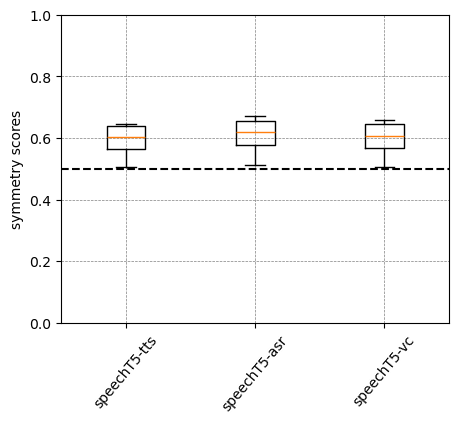

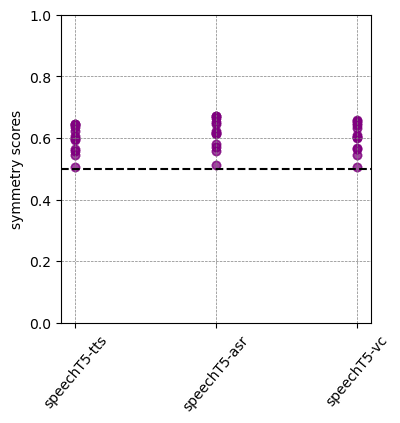

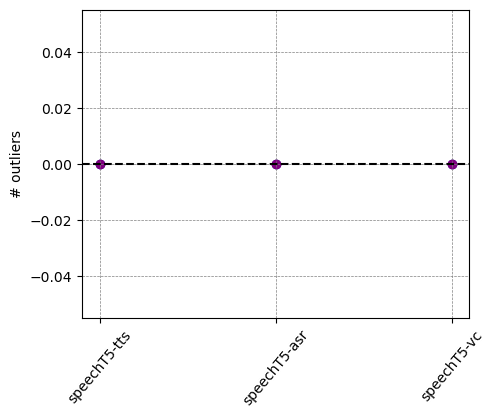

In [19]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)